<a href="https://colab.research.google.com/github/TacticalCoders/NLP-with-Pytorch/blob/main/4_3_CNN_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱 신경망 CNN(Convolutional Neural Networks)

앞 절에서 살펴본 MLP는 순차 패턴을 감지하기에 적합하지 않다.(입력 문자의 바이그램으로 순차 특성을 감지하게 할 수는 있으나 CNN이 더 효율적)

따라서 **공간**상의 부분 구조(이미지 전체보다는 부분을 보는 것)를 감지하는 데 적합한 신경망 CNN(Convolutional Neural Networks)을 사용할 것이다. CNN은 **소수**의 가중치를 사용해 입력 데이터 텐서를 스캔하는 식으로 이를 수행하다. 스캔하면서 부분 구조의 유무를 표현하는 출력 텐서를 만든다.

예를 들어 어떤 사진이 주어졌을 때 이것이 **새인지 아닌지를 구분하는 모델**을 만든다고 가정해보자. 새의 특징은 부리가 있다는 점이다. 사진에 부리가 있다면 새로 판단할 수 있을 것이다. 하지만 부리는 아주 일부분에 픽셀에만 등장할 것이다. 따라서 전체 보다는 부분을 돌면서 부리가 있는지 없는지를 확인하는 것이다. 이렇게 부분을 캐치해는 것을 가능하게 해주는 것이 CNN이다.

CNN은 고전 수학 연산 **합성곱(convolution)**에서 유래했다. 합성곱은 수십년간 디지털 신호 처리와 검퓨터 그래픽 같은 다양한 공학 분야에서 사용되었다. 관행적으로 합성곱은 **프로그래머가 지정한** 파라미터를 사용했다. 하지만 딥러닝에서는 합성곱 필터의 파라미터를 데이터에서 학습한다.


## CNN의 하이퍼 파라미터

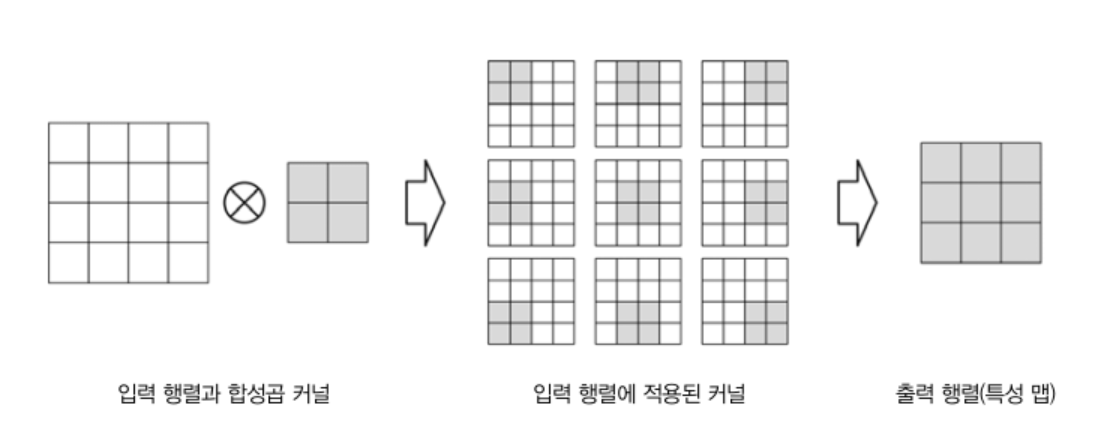

여기서 회색으로 칠해진 것이 '커널(kernel)'이다. 

현재 커널 하나가 입력 행렬(흰색)의 여러 위치에 체계적으로 적용되어 출력 행렬을 만든다. (입력 행렬을 돌며 inner product한 값을 행렬로)

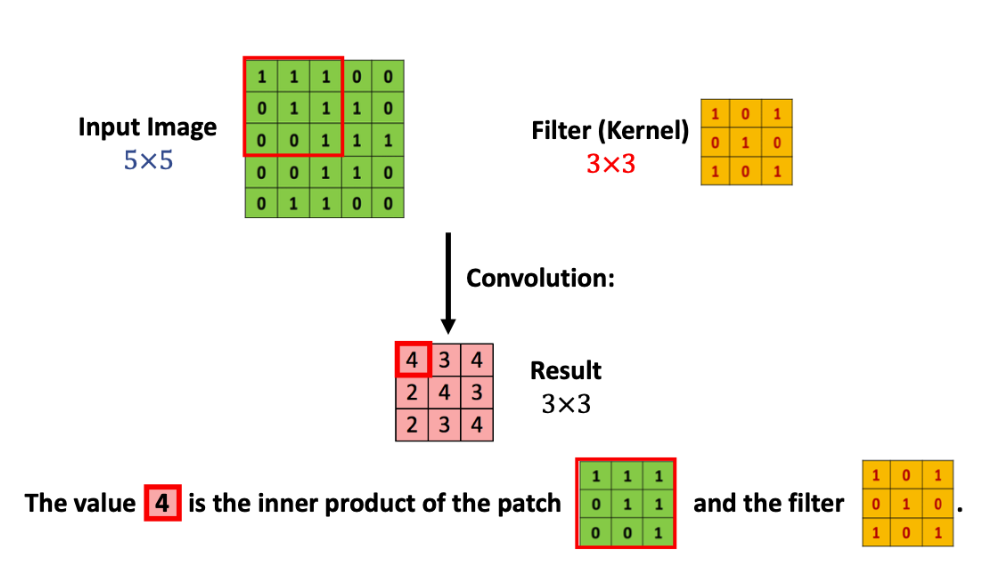

전통적인 합성곱에서는 커널의 값을 지정해야 하지만 CNN은 하이퍼파라미터를 지정해 CNN의 동작을 제어하고 경사 하강법으로 주어진 데이터셋에서 최적의 파라미터를 찾는다.(즉 커널의 값을 사람이 지정해주지 않아도 된다.)

주요 하이퍼 파라미터로는



*   합성곱의 크기(kernel_size)
*   입력 텐서에 곱하는 합성곱의 위치(stride)
*   입력 텐서에 0으로 패딩을 얼마나 추가할지 결정하는 padding
*   커널 텐서에 적용할 때 간격을 얼마나 띄워 곱할지 정하는 dilation 



### 합성곱 연산의 차원

파이토치에는 1차원, 2차원, 3차원 합성곱이 가능하여 각각 Conv1d, Conv2d, Conv3d 클래스로 구현되었다.

1차원 합성곱은 각 타임 스텝에 특성 벡터가 있는 **시계열**에 잘 맞는다. 이런 경우 시퀀스 차원을 따라 패턴을 학습할 수 있다. **NLP에서 합성곱 연산은 대부분 1차원**이다.

2차원 합성곱은 데이터의 두 방향을 따라 시공간 패턴 감지(ex. 높이 너비)한다. 이 때문에 이미지 처리 분야에서 인기가 많다.

3차원 합성공은 데이터의 세 방향을 따라 패턴을 감지한다. (ex. 비디오 데이터->이미지 + 시간)

### 채널

채널은 입력의 각 포인트에 있는 특성 차원을 의미한다. 

이미지의 경우 RGB 각각의 차원 3개가 있다.

텍스트 데이터에서는 한 픽셀이 단어라면 채널의 개수는 어휘 사전의 크기가 된다. 

파이토치의에서는 입력 채널의 개수를 in_channels 매개변수로 받는다.

합성곱 연산을 수행하여 채널(out_channels)이 하나 이상인 출력을 만들 수 있다.

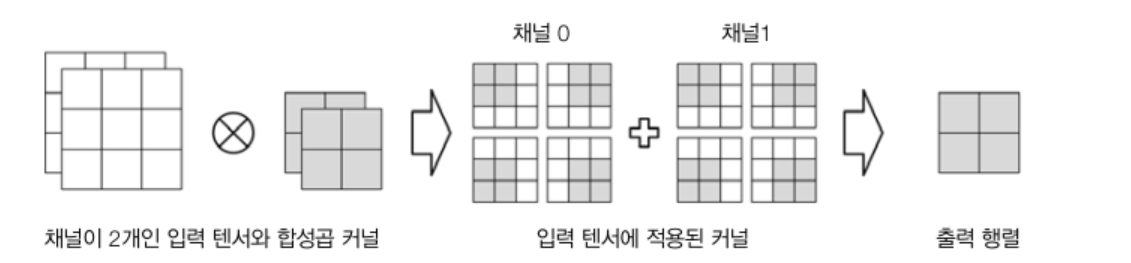

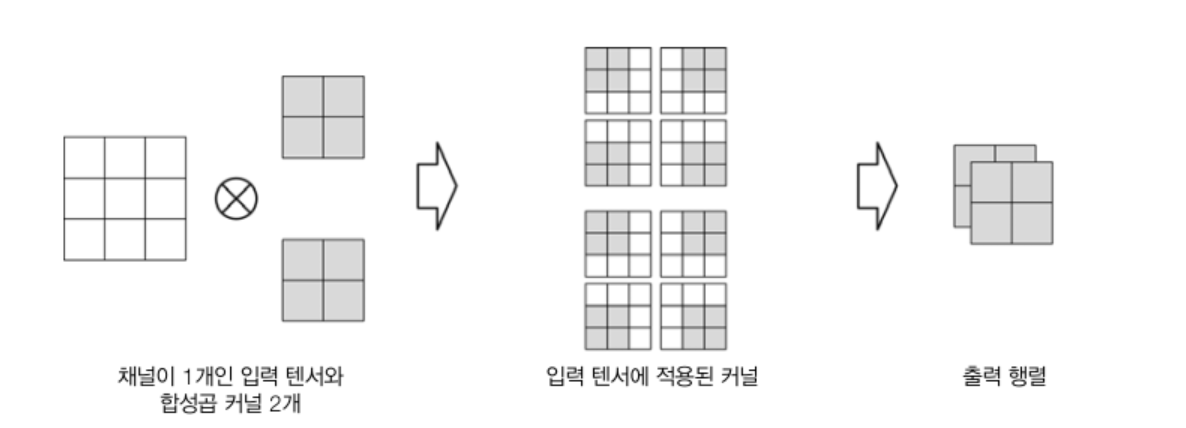

### 커널 크기

커널 행렬의 너비를 커널 크기(kernel size)라고 부른다. 파이토치 kernel_size. 

합성곱은 입력의 공간(혹은 시간)의 국부적인 정보를 합친다. 합성곱마다 **얻어지는 정보의 양**은 커널 크기로 조절된다.

NLP 에서는 여러 단어를 보면서 언어의 패턴을 감지하는 **n-그램과 커널 크기를 비슷**하다고 생각할 수 있다. 

커널 크기(n-그램)의 크기가 작을수록 작고 자주 등장하는 패턴을 감지한다.

커널 크기(n-그램)의 크기가 커지면 큰 패턴을 감지한다. 이는 의미있는 패턴이긴 하나 발생 빈도가 적다. 작은 커널은 상세한 특성을 출력하고 큰 커널은 가끔 등장하는 특성을 만든다.

### 스트라이드(stride)

스트라이드는 합성곱 간의 스텝 크기를 제어한다. 스트라이드가 커널 크기와 같은 커널 연산이 겹치지 않는다. 반면 스트라이드가 1이면 커널이 많이 겹친다.

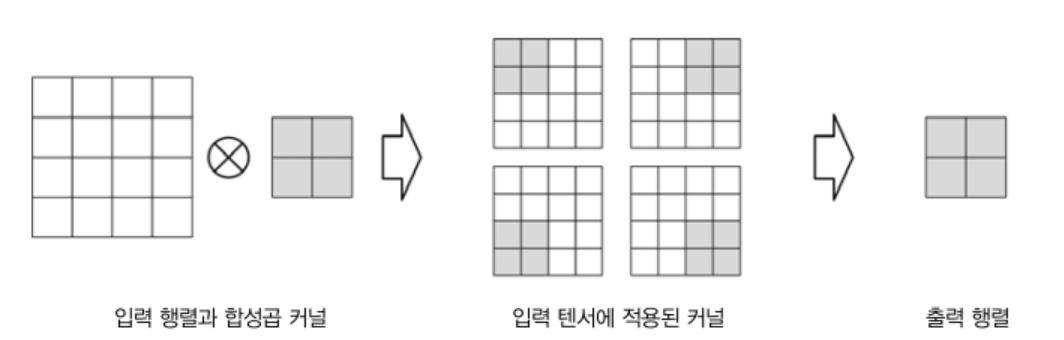

위 그림은 커널 크기(kernel_size)가 2이고 스트라이드를 2로 한 것이다.

위처럼 더 큰 스트라이드를 사용하면 입력 행렬을 듬성듬성 샘플링 한다는 뜻이다. (텐서의 크기 줄임 -> 정보 요약)

반대로 스트라이드가 1이면 가장 많이 겹치게 되는데 이는 입력 행렬을 최대한 촘촘하게 보겠다는 것이다.

### 패딩

스트라이드와 커널사이즈는 특성 맵(합성곱의 출력)의 전체 크기를 의도치 않게 줄이는 바람직하지 않은 부수효과가 발생한다.(손실되는 부분이 발생) 이에 대처하기 위해 입력 텐서의 길이, 높이, 깊이 차원 앞뒤에 0을 추가하여 인공적으로 늘려주는 방법이 있다. 이렇게 하면 CNN이 합성곱을 더 많이 수행할 수 있게 된다.

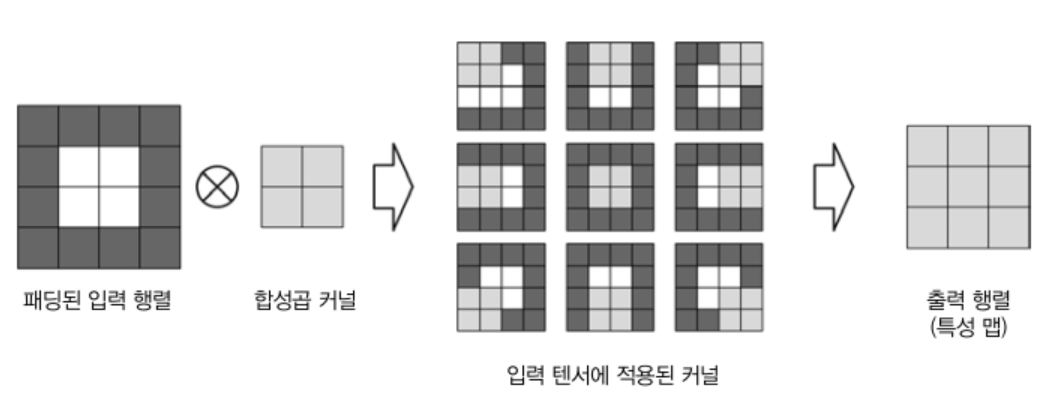

위처럼 높이와 너비가 2인 행렬에 어두운 회색 부분의 패딩을 주어 손실에 대처하는 것이다.

### 다일레이션(dilation)

합성곱 커널이 입력 행렬에 적용되는 방식을 제어한다. 다일레이션 1(기본값)을 2로 늘리면 입력 행렬에 적용될 때 커널의 원소 사이에 공간이 생긴다.(구멍 뚫린 커널) 

이는 파라미터 개수를 늘리지 않고 넓은 입력 공간을 요약하는 데 유용하다. 

연속된 다일레이션 합성곱은 수용장(예측을 만들기 전에 바라보는 입력 공간?)의 크기를 기하급수적으로 늘려준다고 한다.

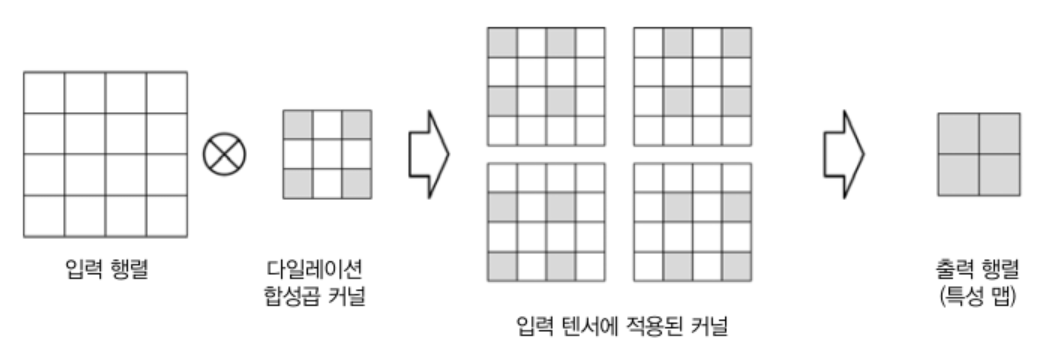

## 파이토치로 CNN 구현하기

일반적으로 신경망 설계의 목적은 작업을 달성할 하이퍼파라미터 설정을 찾는 것이다.

모든 CNN 애플리케이션은 초반의 일련의 합성곱 층을 둔다. 이 층은 특성 맵을 추출하여 다음 처리 단계의 입력으로 전달한다. 분류에서 이 다음 처리 단계는 보통 Linear 층(완전 연결 층)이다.

먼저 실제 데이터와 크기가 같은 인공 데이터 텐서를 만든다.(3차원) 이는 벡터로 변경된 텍스트 데이터에서 만든 미니배치의 크기이다.

문자 시퀀스의 각 문자에 대해 원-핫 벡터를 사용한다면 원-핫 벡터의 시퀀스는 행렬이고, 원-핫 행렬의 미니배치는 3차원 텐서이다. 합성곱 용어를 빌리면 각 원-학 벡터의 크기(어휘사전의 크기)는 입력 채널의 개수이고 문자 시퀀스의 길이는 너비이다.

특성 벡터를 만드는 첫 번째 단계는 파이토치 Conv1d 클래스의 객체를 3차원 데이터 텐서에 적용하는 것이다.

In [10]:
# 인공 데이터와 Conv1d 클래스
import torch
import torch.nn as nn

batch_size = 2
one_hot_size = 10
sequence_width = 7
data = torch.randn(batch_size, one_hot_size, sequence_width)
conv1 = nn.Conv1d(in_channels=one_hot_size, out_channels=16, kernel_size=3)
intermediate1 = conv1(data)
print(data.size())
print(intermediate1.size())

torch.Size([2, 10, 7])
torch.Size([2, 16, 5])


출력 텐서가 줄어들었다.

출력 텐서 크기를 더 줄이려면 합성곱 층을 더 만들어서 차례대로 적용하면 된다.

합성곱을 2개 더 추가 해보자.

In [12]:
conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3)
conv3 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3)

intermediate2 = conv2(intermediate1)
intermediate3 = conv3(intermediate2)

print(intermediate2.size())
print(intermediate3.size())

torch.Size([2, 32, 3])
torch.Size([2, 64, 1])


마지막 차원이 1이 되었다. 이는 이렇게 줄인 것과 같다.

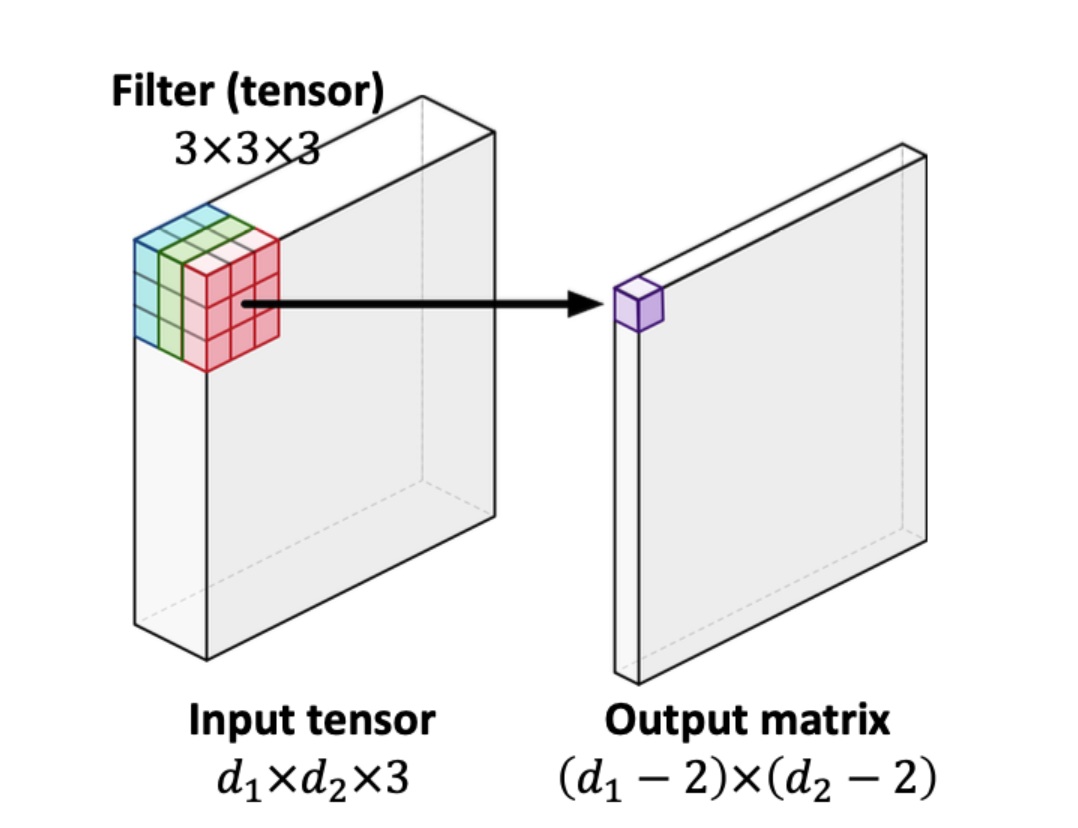

하지만 보다 시피 합성곱마다 채널 차원의 크기는 증가한다. 16 -> 32 -> 64 

이는 채널 차원이 각 데이터 포인트의 특성 벡터가 되기 때문이다. 텐서가 특성 벡터가 되는 최종 단계는 불필요한 크기가 1인 차원을 제거하는 것이다. squeeze() 메서드를 사용하면 된다. 이렇게 만들어진 특성 벡터는 Linear 층과 같은 다른 신경망 구성 요소에 사용하여 에측 벡터를 만들 수 있다.

텐서를 데이터 포인트마다 하나의 특성 벡터로 줄이는 방법이 두 가지 더 있다. 

남은 값을 특성 벡터로 펼치는 방법(view 메서드로 하나의 벡터로 펼침)과 특성 맵 차원을 따라 평균을 계산하는 방법이 있다.

In [13]:
# 펼침 방법
print(intermediate1.view(batch_size,-1).size())

# 평균 방법
print(torch.mean(intermediate1, dim=2).size())
# print(torch.max(intermediate1, dim=2).size()) 합산
# print(torch.sum(intermediate1, dim=2).size()) 최댓값

torch.Size([2, 80])
torch.Size([2, 16])


펼침 방법은 모든 정보를 유지하는 대신에 필요 이상으로 큰 특성 벡터를 만들고, 평균은 일부 정보를 잃을 수 있다.